In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
**************************************************************************
*** Set up
**************************************************************************

adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"



not available in non-GUI version



In [4]:
**************************************************************************
*** Figure4: Canal closure and rebellions: event study
**************************************************************************
gen aperiod=floor((year-1826)/10)*10 
replace aperiod=-60 if aperiod<-60
tab aperiod, gen(aperiod)
keep if aperiod<70

reghdfe $Y c.alongcanal#(c.aperiod2-aperiod15) $ctrls, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) cluster(OBJECTID)
matrix coef = e(b) 
matrix cov = e(V) 
gen coef = .
gen se = .
forvalues i = 1(1)12 {
	replace coef = coef[1,`i'] if _n==`i'
	replace se = sqrt(cov[`i',`i']) if _n==`i'
}
gen lb=coef-invttail(e(df_r),0.025)*se 
gen ub=coef+invttail(e(df_r),0.025)*se 
keep coef se lb ub
drop if coef == .
gen year=_n

#d ;
twoway 
(rarea ub lb year, color("193 205 205%80"))
(scatter coef year, color(gs0) msize(*0.75))
(line coef year, lpattern(solid) lcolor("4 4 4"))
,
ytitle("Coefficients", size(*0.9)) 
xtitle("Number of years since the 1826 reform", size(*0.9) margin(medsmall))
yline(-0.05(0.025)0.2, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(1(0.5)12, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
yline(0, lpattern(dash) lcolor("128 0 0"))
xline(5.5, lpattern(dash) lcolor("128 0 0"))
ylabel(-0.05(0.05)0.2, angle(0) format(%5.2f) labsize(*0.85))
xlabel(1 "-50" 2 "-40" 3 "-30" 4 "-20" 5 "-10" 6 "10" 7 "20" 8 "30" 9 "40" 10 "50" 11 "60" 12 "70", labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figure4.pdf", replace



(66,700 real changes made)


    aperiod |      Freq.     Percent        Cum.
------------+-----------------------------------
        -60 |     72,450       48.09       48.09
        -50 |      5,750        3.82       51.91
        -40 |      5,750        3.82       55.73
        -30 |      5,750        3.82       59.54
        -20 |      5,750        3.82       63.36
        -10 |      5,750        3.82       67.18
          0 |      5,750        3.82       70.99
         10 |      5,750        3.82       74.81
         20 |      5,750        3.82       78.63
         30 |      5,750        3.82       82.44
         40 |      5,750        3.82       86.26
         50 |      5,750        3.82       90.08
         60 |      5,750        3.82       93.89
         70 |      5,750        3.82       97.71
         80 |      3,450        2.29      100.00
------------+-----------------------------------
      Total |    150,650      100.00

(9,200 observations deleted)

(MWFE estimator con

In [5]:
graph export "Results/Figures/figure4.png", replace

(file Results/Figures/figure4.png not found)
file Results/Figures/figure4.png written in PNG format


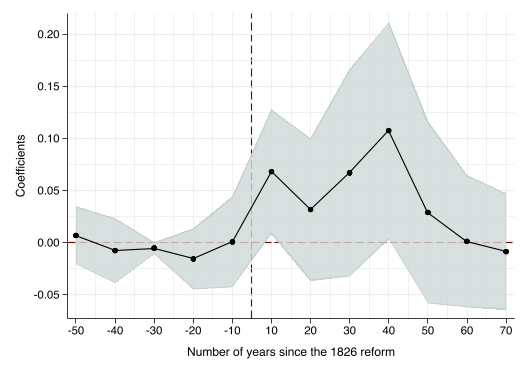

In [6]:

**************************************************************************
*** Write to Latex
**************************************************************************
file open f using "Results/Figures/figure4.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Canal closure and rebellions: event study} " _n
file write f "\includegraphics[width=.8\textwidth]{Figures/figure4.pdf} \\ " _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the differences in rebellions between canal versus non-canal counties before and after the 1826 reform. "
file write f "The markers and capped spikes represent the OLS estimators and 95\% confidence intervals based on standard errors clustered at the county level. "
file write f "The dependent variable is the inverse hyperbolic sine transformation of the number of rebellions normalized by 1600 population. "
file write f "The dashed vertical line represents the 1826 treatment date, and the periods are grouped every 10 years relative to 1826 (i.e., ``-10'' represents the 1816--1825 period, ``10'' represents the 1826--1835 period, etc.. ) "
file write f "The reference groups are the years more than 50 years before 1826. "
file write f "The regression considers county fixed effects, year fixed effects, pre-treatment rebelliousness $ \times $ year fixed effects, and province $ \times $ year fixed effects. }"
file write f "\end{figure}" _n
file close f


(file Results/Figures/figure4.tex not found)













